In [1]:
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import numpy as np

import pandas_datareader.data as web
import datetime as dt

import matplotlib.pyplot as plt

from scipy.optimize import minimize 

from cvxpy import * 

In [3]:
start = dt.datetime(2010, 1, 1)
end = dt.datetime(2022, 9, 1)

# download data 
source = 'stooq'
bondetf = web.DataReader('AGG', source, start, end)
stk1 = web.DataReader('MSFT', source, start, end)
stk2 = web.DataReader('NFLX', source, start, end)
stk3 = web.DataReader('TWTR', source, start, end)
stk4 = web.DataReader('SQ', source, start, end)
stk5 = web.DataReader('AMZN', source, start, end)

lsttojoin = [bondetf['Close'],stk1['Close'],stk2['Close'],stk3['Close'], stk4['Close'],stk5['Close']]

prcdf = pd.concat(lsttojoin,axis=1)

prcdf.columns = ['AGG','MSFT','NFLX','TWTR','SQ','AMZN']

prcdf = prcdf['2016':]
rtndf = prcdf.pct_change(1).dropna()

In [4]:
w = np.array([0.2,0.2,0.1,0.1,0.1,0.3])

In [5]:
def avg_port_rtn(w):
    '''
    w = vector of weights for each security
    mu_P(w) from board notes
    '''
    return np.mean(np.sum(w*rtndf,axis=1))

def port_var(w): 
    '''
    sig_P(w)**2 from board notes  
    '''
    return np.dot(w,np.dot(rtndf.cov(),w))

In [6]:
def monte_carlo_asset_allocation(numruns): 
    '''
    numruns: int that indicate how many random 
             portfolios to generate
    '''
    n = len(rtndf.columns) # number of securities 
    zlst = [] 

    for _ in range(numruns):
        tmpw = np.random.rand(n)
        tmpw = tmpw/np.sum(tmpw)
        tmpmu = avg_port_rtn(tmpw)
        tmpsig = np.sqrt(port_var(tmpw))
        zlst.append([tmpsig,tmpmu])

    return np.array(zlst) 
    

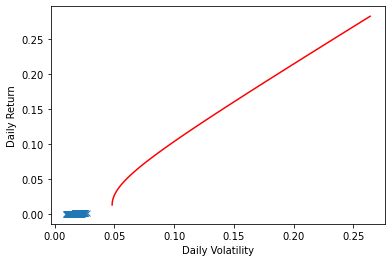

In [9]:

if __name__ == "__main__": 
    numruns = 3000
    mcdata = monte_carlo_asset_allocation(numruns)

    plt.figure()
    plt.plot(mcdata[:,0],mcdata[:,1],'x')
    plt.xlabel('Daily Volatility')
    plt.ylabel('Daily Return')

   

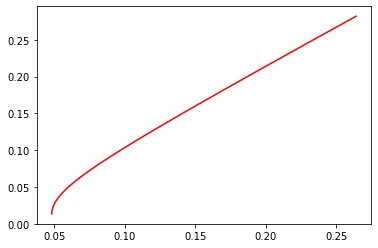

In [14]:
 numgrdpts = 100
lam_vals = np.linspace(0,0.5 , num=numgrdpts)

risk_data = []
ret_data = []
    
for i in range(numgrdpts):
     x = Variable(len(rtndf.columns))
     lam = lam_vals[i]

     dly_rtn =  rtndf.mean().values
     cov = rtndf.cov().values
    
     prob = Problem(Minimize(quad_form(x,cov)-lam*dly_rtn.T@x),[x>=0,sum(x)==1])

     prob.solve()
     w = np.array(x.value).flatten()
     risk_data.append(np.sqrt(port_var(w)))
     ret_data.append(avg_port_rtn(w))
        #print(np.array(x.value).flatten())


#plt.plot(risk_data,ret_data,'r-')
plt.plot(np.sqrt(252)*np.array(risk_data),252*np.array(ret_data),'r-')
plt.show()

In [21]:

%pip install cvxopt
%pip install cufflinks
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cvxopt as opt
from cvxopt import blas, solvers
import pandas as pd

np.random.seed(123)

Note: you may need to restart the kernel to use updated packages.

  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68736 sha256=ebb8e8b314a567c79d5eebf577e8df852ce3270e65e6746bcd0ccae5e36fedcf
  Stored in directory: c:\users\payal\appdata\local\pip\cache\wheels\29\b4\f8\2fd2206eeeba6ccad8167e4e8894b8c4ec27bf1342037fd136
Successfully built cufflinks


In [22]:
import plotly
import cufflinks
plotly.__version__

'5.6.0'

In [26]:

#import plotly.plotly as py  

# (*) Useful Python/Plotly tools
import plotly.tools as tls   

# (*) Graph objects to piece together plots
from plotly.graph_objs import *

In [80]:
n_assets = 4

## NUMBER OF OBSERVATIONS
n_obs = 1000

return_vec = np.random.randn(n_assets, n_obs)
return_vec

array([[ 2.05259206, -0.27929923,  0.92025423, ...,  0.81670296,
         2.43913437, -0.7088245 ],
       [-0.6406721 ,  0.23099167,  1.34975599, ..., -0.76613694,
         1.11218225,  0.0768315 ],
       [-1.56644206, -1.26763713,  0.22147963, ...,  0.66874619,
        -0.42777613, -0.37900132],
       [ 1.31032519,  0.59984919,  0.44229277, ...,  2.11048949,
        -0.06025165, -1.10073474]])

Text(0, 0.5, 'returns')

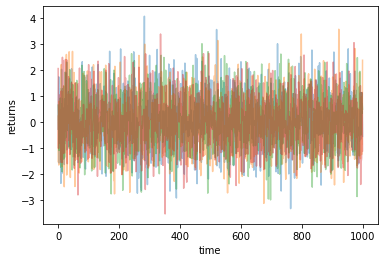

In [32]:
fig = plt.figure()
plt.plot(return_vec.T, alpha=.4);
plt.xlabel('time')
plt.ylabel('returns')

In [37]:
return_vec.T

array([[-2.00870453,  0.35798258, -0.35949264, -1.82050763],
       [-0.67092755,  0.22891794, -0.93395125,  0.16365047],
       [ 1.48906165, -0.83745152, -0.42193554, -0.68235433],
       [-0.15828097, -0.41824124, -0.02255774, -0.60796765]])

In [75]:
def rand_weights(n):
    ''' Produces n random weights that sum to 1 '''
    k = np.random.rand(n)
    k /= k.sum()
    
    return k


In [77]:
print(rand_weights(n_assets))
print(rand_weights(n_assets))

[0.26970853 0.26950728 0.25179952 0.20898467]
[0.27730348 0.10452874 0.28035684 0.33781094]


In [91]:
np.mean(return_vec, axis=1)

array([ 0.08213154,  0.01627001, -0.0048122 ,  0.00046148])

In [89]:
np.cov(return_vec)

array([[ 0.98430326, -0.01534051, -0.01729085, -0.00447594],
       [-0.01534051,  1.02325192, -0.02063145, -0.01432972],
       [-0.01729085, -0.02063145,  0.99975393,  0.00924935],
       [-0.00447594, -0.01432972,  0.00924935,  1.08555576]])

In [96]:
def random_portfolio(returns):
    ''' 
    Returns the mean and standard deviation of returns for a random portfolio
    '''

    p = np.asmatrix(np.mean(returns, axis=1))
    w = np.asmatrix(rand_weights(returns.shape[0]))
    C = np.asmatrix(np.cov(returns))
    
    mu = w * p.T
    sigma = np.sqrt(w * C * w.T)
    return mu, sigma

In [99]:
n_portfolios = 500
means, stds = np.column_stack([random_portfolio(return_vec) for _ in range(n_portfolios)])

Text(0.5, 1.0, 'Mean and standard deviation of returns of randomly generated portfolios')

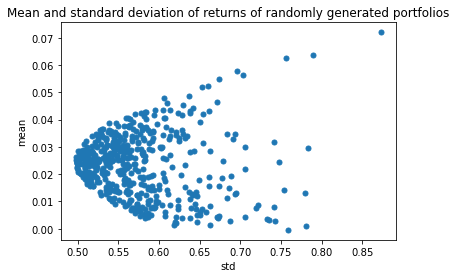

In [100]:
fig = plt.figure()
plt.plot(stds, means, 'o', markersize=5)
plt.xlabel('std')
plt.ylabel('mean')
plt.title('Mean and standard deviation of returns of randomly generated portfolios')

In [108]:
!git add Untitled14.ipynb

fatal: not a git repository (or any of the parent directories): .git
